## HDT 3
### Clasificación

### Parte 1

In [ ]:
## Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11


%matplotlib inline

In [ ]:

# Cargamos los datos
datos = pd.read_csv('manzanas.csv')

# Información sobre el conjunto de datos
print("Información sobre el conjunto de datos:")
print(datos.info())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(datos.describe())

# Forma del conjunto de datos (número de filas y columnas)
print("\nForma del conjunto de datos:")
print(datos.shape)


In [ ]:
# Profiling
profile = ProfileReport(datos)
profile

## Parte 2

In [2]:
import pandas as pd

# Cargar los datos
datos = pd.read_csv('manzanas.csv')

# Visualizar las primeras filas del DataFrame
print(datos.head())

# Drop l a ultima fila del dataframe limpiando
datos = datos.drop([datos.index[-1]])
    



    ID    Tamaño      Peso   Dulzura   Textura   Humedad   Madurez  \
0  0.0 -3.970049 -2.512336  5.346330 -1.012009  1.844900  0.329840   
1  1.0 -1.195217 -2.839257  3.664059  1.588232  0.853286  0.867530   
2  2.0 -0.292024 -1.351282 -1.738429 -0.342616  2.838636 -0.038033   
3  3.0 -0.657196 -2.271627  1.324874 -0.097875  3.637970 -3.413761   
4  4.0  1.364217 -1.296612 -0.384658 -0.553006  3.030874 -1.303849   

         Acidez Calidad  
0  -0.491590483   buena  
1  -0.722809367   buena  
2   2.621636473    mala  
3   0.790723217   buena  
4   0.501984036   buena  


## Naive Bayes

Naive Bayes
Predicciones vs. Valores reales:
[['mala' 'mala']
 ['mala' 'buena']
 ['buena' 'buena']
 ...
 ['mala' 'buena']
 ['buena' 'buena']
 ['buena' 'mala']]
Matriz de Confusión:
[[374 120]
 [139 367]]
Precisión: 0.741


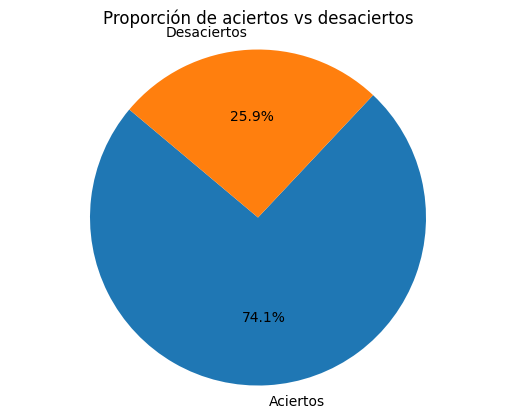

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Cargar los datos
# Reemplazar los valores NaN por el promedio en las columnas 'Tamaño' y 'Peso'
datos['Tamaño'] = datos['Tamaño'].fillna(datos['Tamaño'].mean())
datos['Peso'] = datos['Peso'].fillna(datos['Peso'].mean())

# Cargar los datos actualizados
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.25, random_state=0)

# Definir y entrenar el modelo Naive Bayes
clasificador_NB = GaussianNB()
clasificador_NB.fit(X_entreno, y_entreno)

# Evaluar el modelo
y_predicciones = clasificador_NB.predict(X_prueba)
print("Naive Bayes")
print("Predicciones vs. Valores reales:")
print(np.column_stack((y_predicciones, y_prueba)))
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Calcular el número de aciertos y desaciertos
aciertos = confusion_matrix(y_prueba, y_predicciones)[0, 0] + confusion_matrix(y_prueba, y_predicciones)[1, 1]
desaciertos = confusion_matrix(y_prueba, y_predicciones)[0, 1] + confusion_matrix(y_prueba, y_predicciones)[1, 0]

# Crear etiquetas para el gráfico de pastel
etiquetas = ['Aciertos', 'Desaciertos']
valores = [aciertos, desaciertos]

# Crear el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de aciertos vs desaciertos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()




## Regresión Logística


Regresión Logística
Predicciones vs. Valores reales:
[['mala' 'mala']
 ['buena' 'buena']
 ['buena' 'buena']
 ...
 ['buena' 'buena']
 ['buena' 'buena']
 ['mala' 'mala']]
Matriz de Confusión:
[[367 127]
 [146 360]]
Precisión: 0.727


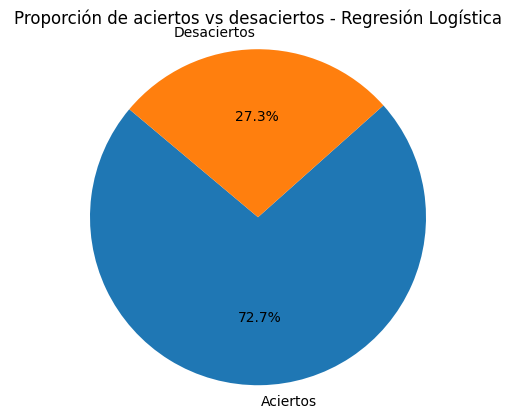

In [24]:
from sklearn.linear_model import LogisticRegression

# Definir el clasificador de regresión logística con un valor más alto de max_iter
clasificador_LR = LogisticRegression(random_state=0, max_iter=1000)

# Entrenar el clasificador
clasificador_LR.fit(X_entreno, y_entreno)


# Evaluar el modelo
y_predicciones = clasificador_LR.predict(X_prueba)
print("\nRegresión Logística")
print("Predicciones vs. Valores reales:")
print(np.column_stack((y_predicciones, y_prueba)))
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Calcular el número de aciertos y desaciertos
aciertos_LR = confusion_matrix(y_prueba, y_predicciones)[0, 0] + confusion_matrix(y_prueba, y_predicciones)[1, 1]
desaciertos_LR = confusion_matrix(y_prueba, y_predicciones)[0, 1] + confusion_matrix(y_prueba, y_predicciones)[1, 0]

# Crear etiquetas para el gráfico de pastel
etiquetas_LR = ['Aciertos', 'Desaciertos']
valores_LR = [aciertos_LR, desaciertos_LR]

# Crear el gráfico de pastel
plt.pie(valores_LR, labels=etiquetas_LR, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de aciertos vs desaciertos - Regresión Logística')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## KNN


K-Vecinos más Cercanos
Matriz de Confusión:
[[259 235]
 [193 313]]
Precisión: 0.572


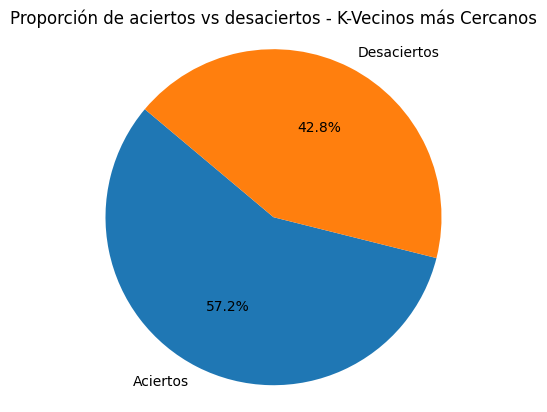

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Definir y entrenar el modelo de K-Vecinos más Cercanos
clasificador_KNN = KNeighborsClassifier(n_neighbors=1)
clasificador_KNN.fit(X_entreno, y_entreno)

# Evaluar el modelo
y_predicciones = clasificador_KNN.predict(X_prueba)
print("\nK-Vecinos más Cercanos")
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Calcular el número de aciertos y desaciertos
aciertos_KNN = confusion_matrix(y_prueba, y_predicciones)[0, 0] + confusion_matrix(y_prueba, y_predicciones)[1, 1]
desaciertos_KNN = confusion_matrix(y_prueba, y_predicciones)[0, 1] + confusion_matrix(y_prueba, y_predicciones)[1, 0]

# Crear etiquetas para el gráfico de pastel
etiquetas_KNN = ['Aciertos', 'Desaciertos']
valores_KNN = [aciertos_KNN, desaciertos_KNN]

# Crear el gráfico de pastel
plt.pie(valores_KNN, labels=etiquetas_KNN, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de aciertos vs desaciertos - K-Vecinos más Cercanos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



## SVM Lineal


SVM Lineal
Matriz de Confusión:
[[368 126]
 [149 357]]
Precisión: 0.725


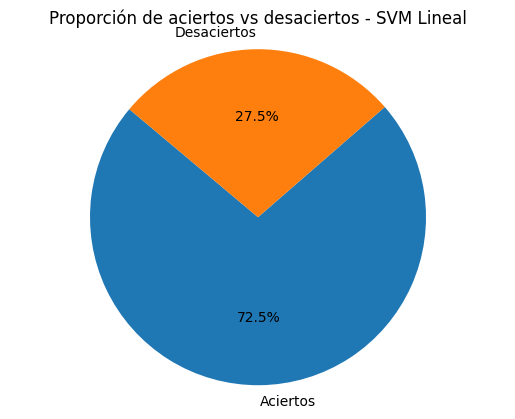

In [30]:
from sklearn.svm import SVC

# Definir y entrenar el modelo SVM Lineal
clasificador_SVM_linear = SVC(kernel='linear', random_state=0)
clasificador_SVM_linear.fit(X_entreno, y_entreno)

# Evaluar el modelo
y_predicciones = clasificador_SVM_linear.predict(X_prueba)
print("\nSVM Lineal")
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Calcular el número de aciertos y desaciertos
aciertos_SVM_linear = confusion_matrix(y_prueba, y_predicciones)[0, 0] + confusion_matrix(y_prueba, y_predicciones)[1, 1]
desaciertos_SVM_linear = confusion_matrix(y_prueba, y_predicciones)[0, 1] + confusion_matrix(y_prueba, y_predicciones)[1, 0]

# Crear etiquetas para el gráfico de pastel
etiquetas_SVM_linear = ['Aciertos', 'Desaciertos']
valores_SVM_linear = [aciertos_SVM_linear, desaciertos_SVM_linear]

# Crear el gráfico de pastel
plt.pie(valores_SVM_linear, labels=etiquetas_SVM_linear, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de aciertos vs desaciertos - SVM Lineal')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## SVM con Kernel


SVM con Kernel RBF
Matriz de Confusión:
[[255 239]
 [280 226]]
Precisión: 0.481


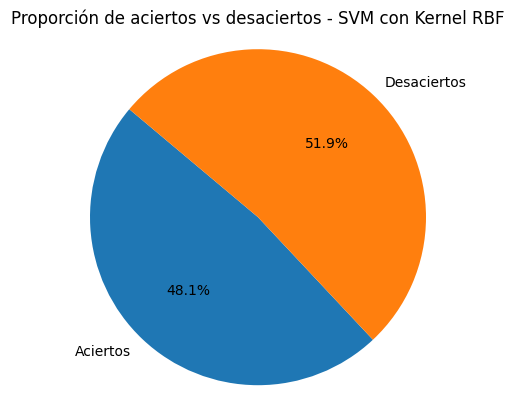

In [32]:
# Definir y entrenar el modelo SVM con Kernel RBF
clasificador_SVM_rbf = SVC(kernel='rbf', random_state=0)
clasificador_SVM_rbf.fit(X_entreno, y_entreno)

# Evaluar el modelo
y_predicciones = clasificador_SVM_rbf.predict(X_prueba)
print("\nSVM con Kernel RBF")
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Calcular el número de aciertos y desaciertos
aciertos_SVM_rbf = confusion_matrix(y_prueba, y_predicciones)[0, 0] + confusion_matrix(y_prueba, y_predicciones)[1, 1]
desaciertos_SVM_rbf = confusion_matrix(y_prueba, y_predicciones)[0, 1] + confusion_matrix(y_prueba, y_predicciones)[1, 0]

# Crear etiquetas para el gráfico de pastel
etiquetas_SVM_rbf = ['Aciertos', 'Desaciertos']
valores_SVM_rbf = [aciertos_SVM_rbf, desaciertos_SVM_rbf]

# Crear el gráfico de pastel
plt.pie(valores_SVM_rbf, labels=etiquetas_SVM_rbf, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de aciertos vs desaciertos - SVM con Kernel RBF')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Arbol de Decisión


Árbol de Decisión
Matriz de Confusión:
[[391 103]
 [122 384]]
Precisión: 0.775


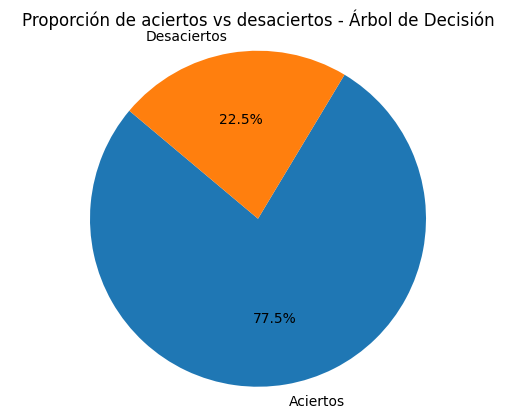

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Definir y entrenar el modelo Árbol de Decisión
clasificador_DT = DecisionTreeClassifier(criterion='gini', random_state=0)
clasificador_DT.fit(X_entreno, y_entreno)

# Evaluar el modelo
y_predicciones = clasificador_DT.predict(X_prueba)
print("\nÁrbol de Decisión")
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Calcular el número de aciertos y desaciertos
aciertos_DT = confusion_matrix(y_prueba, y_predicciones)[0, 0] + confusion_matrix(y_prueba, y_predicciones)[1, 1]
desaciertos_DT = confusion_matrix(y_prueba, y_predicciones)[0, 1] + confusion_matrix(y_prueba, y_predicciones)[1, 0]

# Crear etiquetas para el gráfico de pastel
etiquetas_DT = ['Aciertos', 'Desaciertos']
valores_DT = [aciertos_DT, desaciertos_DT]

# Crear el gráfico de pastel
plt.pie(valores_DT, labels=etiquetas_DT, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de aciertos vs desaciertos - Árbol de Decisión')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Random Forest


Random Forest
Matriz de Confusión:
[[445  49]
 [ 80 426]]
Precisión: 0.871


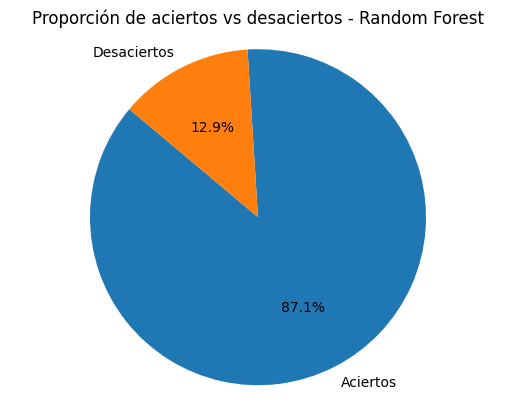

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Definir y entrenar el modelo Random Forest con los mejores hiperparámetros encontrados
clasificador_RF = RandomForestClassifier(n_estimators=100, 
                                         max_depth=None, 
                                         min_samples_split=5, 
                                         min_samples_leaf=1,
                                         random_state=0)
clasificador_RF.fit(X_entreno, y_entreno)

# Evaluar el modelo
y_predicciones = clasificador_RF.predict(X_prueba)
print("\nRandom Forest")
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Calcular el número de aciertos y desaciertos
aciertos_RF = confusion_matrix(y_prueba, y_predicciones)[0, 0] + confusion_matrix(y_prueba, y_predicciones)[1, 1]
desaciertos_RF = confusion_matrix(y_prueba, y_predicciones)[0, 1] + confusion_matrix(y_prueba, y_predicciones)[1, 0]

# Crear etiquetas para el gráfico de pastel
etiquetas_RF = ['Aciertos', 'Desaciertos']
valores_RF = [aciertos_RF, desaciertos_RF]

# Crear el gráfico de pastel
plt.pie(valores_RF, labels=etiquetas_RF, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de aciertos vs desaciertos - Random Forest')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Random Forest
Matriz de Confusión:
[[445  49]
 [ 80 426]]
Precisión: 0.871


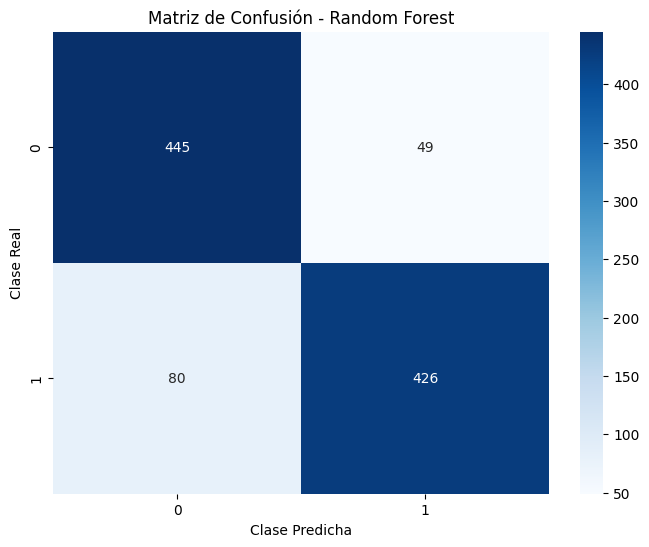

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir y entrenar el modelo Random Forest
# Definir y entrenar el modelo Random Forest con los mejores hiperparámetros encontrados
clasificador_RF = RandomForestClassifier(n_estimators=100, 
                                         max_depth=None, 
                                         min_samples_split=5, 
                                         min_samples_leaf=1,
                                         random_state=0)
clasificador_RF.fit(X_entreno, y_entreno)

# Evaluar el modelo
y_predicciones = clasificador_RF.predict(X_prueba)
print("\nRandom Forest")
print("Matriz de Confusión:")
print(confusion_matrix(y_prueba, y_predicciones))
print("Precisión:", accuracy_score(y_prueba, y_predicciones))

# Crear matriz de confusión
cm = confusion_matrix(y_prueba, y_predicciones)

# Crear mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


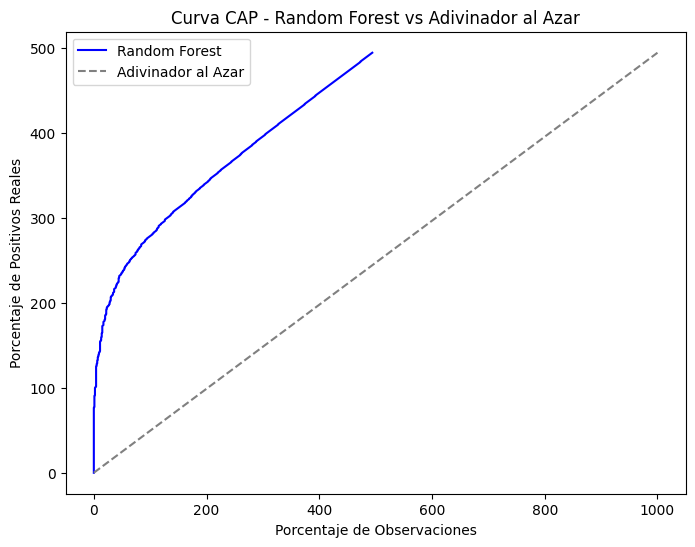

In [85]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Mapear 'buena' a 1 y 'mala' a 0 en y_prueba
y_prueba_numerica = np.array([1 if etiqueta == 'buena' else 0 for etiqueta in y_prueba])

# Definir y entrenar el modelo Random Forest
clasificador_RF = RandomForestClassifier(n_estimators=100, 
                                         max_depth=None, 
                                         min_samples_split=5, 
                                         min_samples_leaf=1,
                                         random_state=0)
clasificador_RF.fit(X_entreno, y_entreno)

# Obtener las probabilidades predichas por el modelo
y_pred_proba_RF = clasificador_RF.predict_proba(X_prueba)[:, 1]

# Ordenar las observaciones según las probabilidades predichas
sorted_indices_RF = np.argsort(y_pred_proba_RF)[::-1]

# Calcular el porcentaje acumulado de positivos reales
y_real_positives_cumulative = np.cumsum(y_prueba_numerica[sorted_indices_RF])

# Calcular el porcentaje acumulado de todas las observaciones
total_positive_obs = np.sum(y_prueba_numerica)
total_obs = len(y_prueba_numerica)
y_total_cumulative = np.linspace(0, total_positive_obs, total_obs)

# Graficar la curva CAP
plt.figure(figsize=(8, 6))
plt.plot(y_real_positives_cumulative,y_total_cumulative , color='blue', label='Random Forest')
plt.plot([0, total_obs], [0, total_positive_obs], color='grey', linestyle='--', label='Adivinador al Azar')
plt.xlabel('Porcentaje de Observaciones')
plt.ylabel('Porcentaje de Positivos Reales')
plt.title('Curva CAP - Random Forest vs Adivinador al Azar')
plt.legend()
plt.show()



